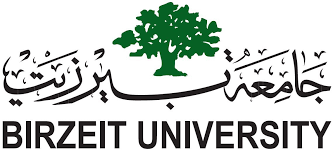

Faculty of Engineering and Technology

Electrical and Computer Engineering Department

ENCS5343 Computer Vision

Assignment # 1

Student name: Katya Kobari

Student ID: 1201478

Original Image


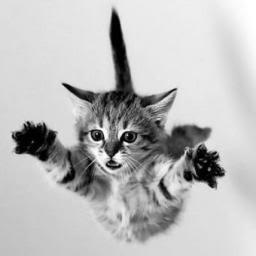

In [83]:
#Q1-Part 1
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
originalImg = cv2.imread('q1.png' , cv2.IMREAD_GRAYSCALE)
print('Original Image')
cv2_imshow(originalImg)

power law transformation with gamma=0.4 Result


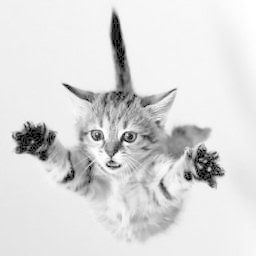

In [84]:
#O1-Part 2 'power law transformation with gamma=0.4'
gamma = 0.4
Imgp2 = np.power(originalImg / 255.0, gamma) * 255.0 # Apply the power law transformation
Imgp2 = np.uint8(Imgp2) # Convert the result Img to unsigned 8 bit int
print('power law transformation with gamma=0.4 Result')
cv2_imshow(Imgp2)

Adding zero-mean Gaussian noise result


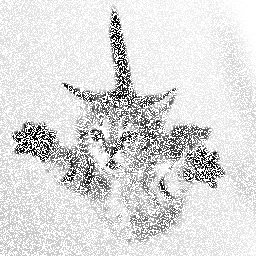

In [85]:
#Q1-Part 3 'Add a zero-mean Gaussian noise (with variance =40 gray-levels) '
noise = np.random.normal(0,np.sqrt(40), originalImg.shape) # Applay zero-mean Gaussian noise with variance 40
noise = noise.reshape(originalImg.shape).astype(np.uint8)
Imgp3 =cv2.add(originalImg,noise)
print('Adding zero-mean Gaussian noise result')
cv2_imshow(Imgp3)

5x5 mean filter to the noisy-image result


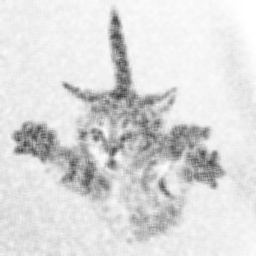

In [86]:
#Q1-Part 4 '5x5 mean filter to the noisy-image I obtained in point 3 above'
Imgp4 = cv2.blur(Imgp3, (5, 5)) # Apply a 5x5 mean filter
print('5x5 mean filter to the noisy-image result')
cv2_imshow(Imgp4)

In the previous section, we added Gaussian noise to a grayscale image, resulting in unexpected changes in pixel brightness. To remove noise, we applied a 5 x 5 “average” filter, which smoothes each pixel by considering its neighbors. This helps create a sharper image with less noise. However, this process sacrifices some detail and clarity. Choosing the appropriate filter size and type depends on the specific image and the balance required between reducing noise and preserving fine detail.

Add salt and pepper noise result


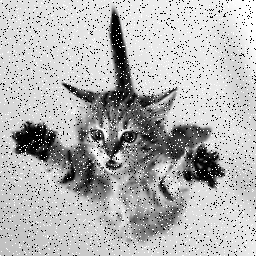

apply a 7x7 median filter to the noisy-image result


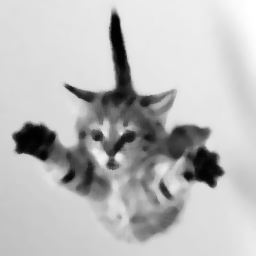

In [87]:
#Q1-Part 5 'Add salt and pepper noise (noise-density=0.1) to the original image and then apply a 7x7 median filter to the noisy-image'
salt_pepper_mask = np.random.rand(*originalImg.shape) < 0.1 # Generate a mask for salt and pepper noise with a 0.1 probability
salt_pepper_noise = np.zeros_like(originalImg)
salt_pepper_noise[salt_pepper_mask] = 255 * (np.random.rand(*originalImg.shape)[salt_pepper_mask] < 0.5).astype(np.uint8)
Imgp5Noise = np.where(salt_pepper_mask, salt_pepper_noise, originalImg)
print('Add salt and pepper noise result')
cv2_imshow(Imgp5Noise)
print('apply a 7x7 median filter to the noisy-image result')
Imgp5median = cv2.medianBlur(Imgp5Noise, 7) # Apply a 7x7 median filter to the image with salt and pepper noise
cv2_imshow(Imgp5median)

Apply a 7x7 mean filter to the salt and pepper noisy-image result


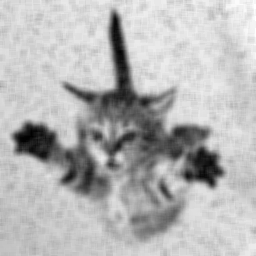

In [88]:
#Q1-Part 6 'Apply a 7 by 7 mean filter to the salt and pepper noisy-image'
Imgp6Mean = cv2.blur(Imgp5Noise, (7, 7)) #Apply a 7x7 mean filter to the image with salt and pepper noise
print('Apply a 7x7 mean filter to the salt and pepper noisy-image result')
cv2_imshow(Imgp6Mean)


To tackle the salt-and-pepper noise in our image, we utilized a 7x7 median filter. This technique involved replacing each pixel value in the image with the median value of its neighboring pixels. The outcome was remarkable, as the noise was significantly reduced while the intricate details and edges in the image remained intact. This filter is particularly reliable in handling outliers, making it an ideal candidate for addressing sudden instances of noise like salt and pepper. Conversely, we also explored the use of a 7x7 mean filter on the noisy image. This filter works by calculating the average pixel value within a neighborhood, providing decent noise reduction but with a potential trade-off of blurred image quality. Our comparison revealed that the median filter yielded clearer results, making it the preferred choice in situations with salt-and-pepper noise. Ultimately, the decision will depend on the specific requirements and circumstances at hand.

Gx


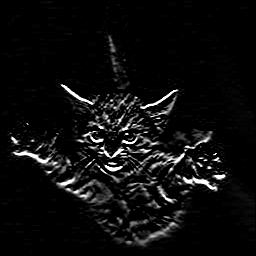

Gy


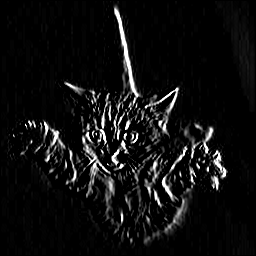

Sobel filter result


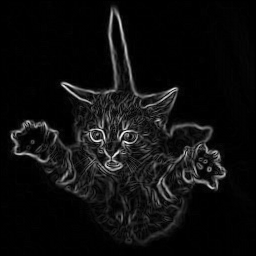

In [91]:
#Q1-Part 7
#Sobel filter kernels
sy=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sx= np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# Function to apply Sobel convolution
def sobel_convolution(img, kernel):
    result = np.zeros_like(img, dtype=np.float32)
    kernel_size = len(kernel)
    k = kernel_size // 2

    for i in range(k, img.shape[0] - k):
        for j in range(k, img.shape[1] - k):
            result[i, j] = np.sum(img[i - k:i + k + 1, j - k:j + k + 1] * kernel)

    return result
# Apply Sobel convolution
gx = sobel_convolution(originalImg, sx)
print('Gx')
cv2_imshow(gx)
gy = sobel_convolution(originalImg, sy)
print('Gy')
cv2_imshow(gy)
# Calculate the magnitude of the gradient
mag = np.sqrt(gx**2 + gy**2)
sobel_result = ((mag - np.min(mag)) / np.ptp(mag) * 255).astype(np.uint8)
print('Sobel filter result')
cv2_imshow(sobel_result)


HOUSE 1


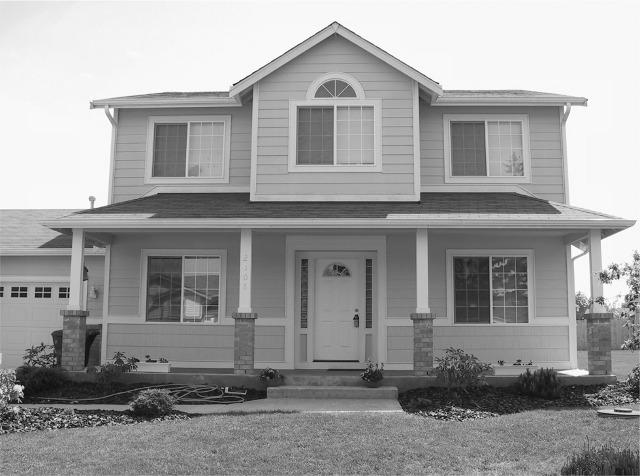

HOUSE 2


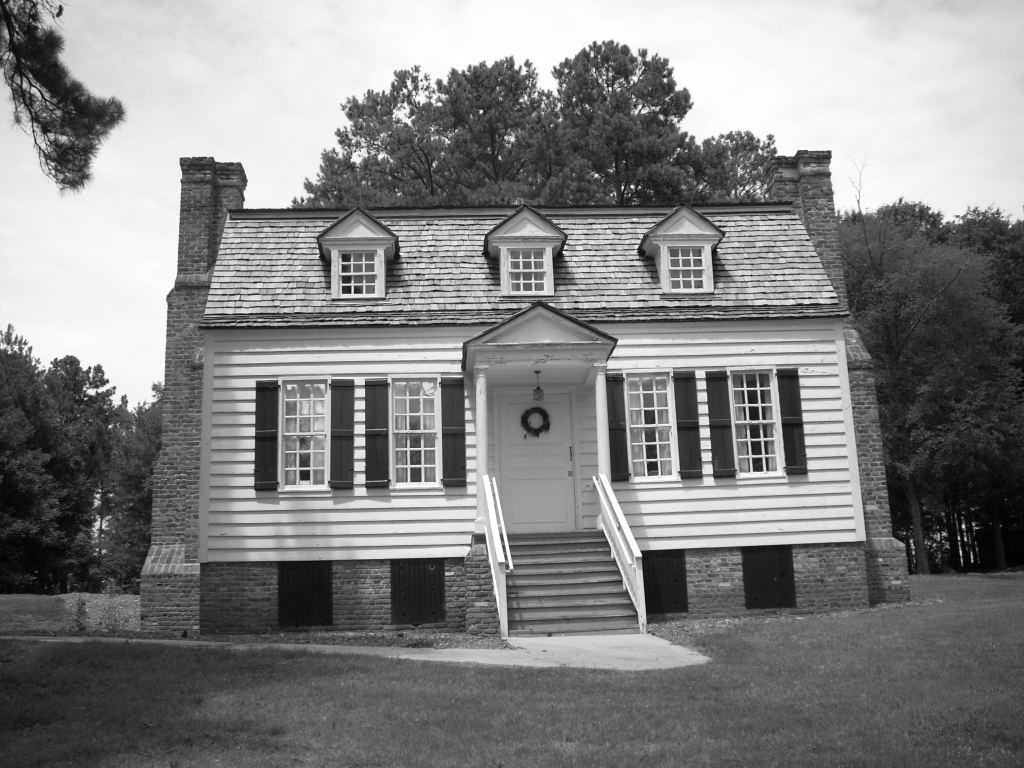

In [ ]:
#Q2
# Load the grayscale images
house1 = cv2.imread('House1.jpg', cv2.IMREAD_GRAYSCALE)
house2 = cv2.imread('House2.jpg', cv2.IMREAD_GRAYSCALE)
#function that convolves an image with a given convolution filter
def Filter_con(input_image, kernel):
    filter_height, filter_width = kernel.shape
    image_height, image_width = input_image.shape
    pad_height = filter_height-1 // 2
    pad_width = filter_width-1 // 2
    padRes = np.pad(input_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    output_image = np.zeros_like(input_image, dtype=np.float32)

    for i in range(image_height):
        for j in range(image_width):
            region = padRes[i:i+filter_height, j:j+filter_width]
            output_image[i, j] = np.sum(region * kernel)

    return output_image
print('HOUSE 1')
cv2_imshow(house1)
print('HOUSE 2')
cv2_imshow(house2)

HOUSE 1 Avg 3x3


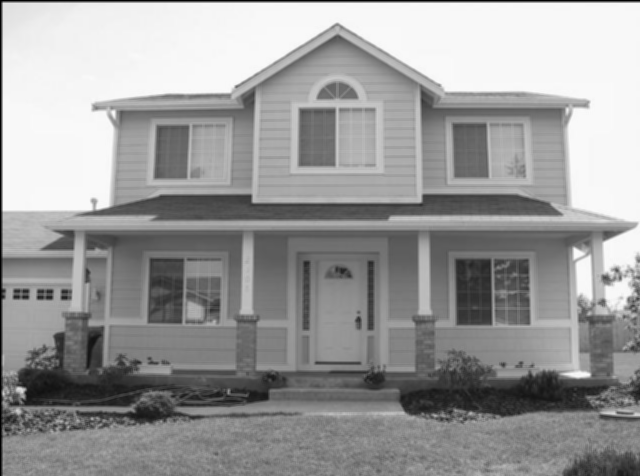

HOUSE 1 Avg 5x5


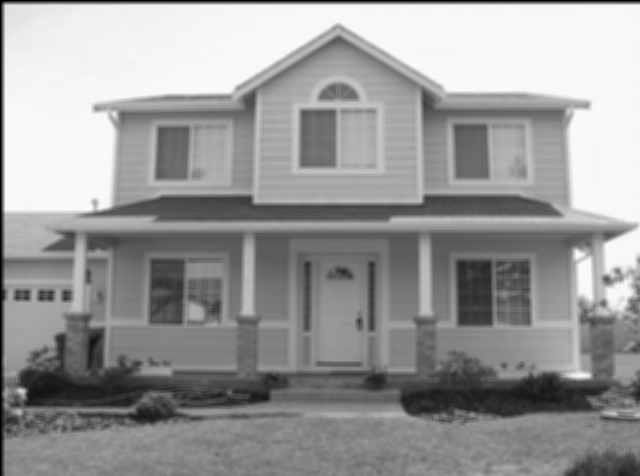

HOUSE 2 Avg 3x3


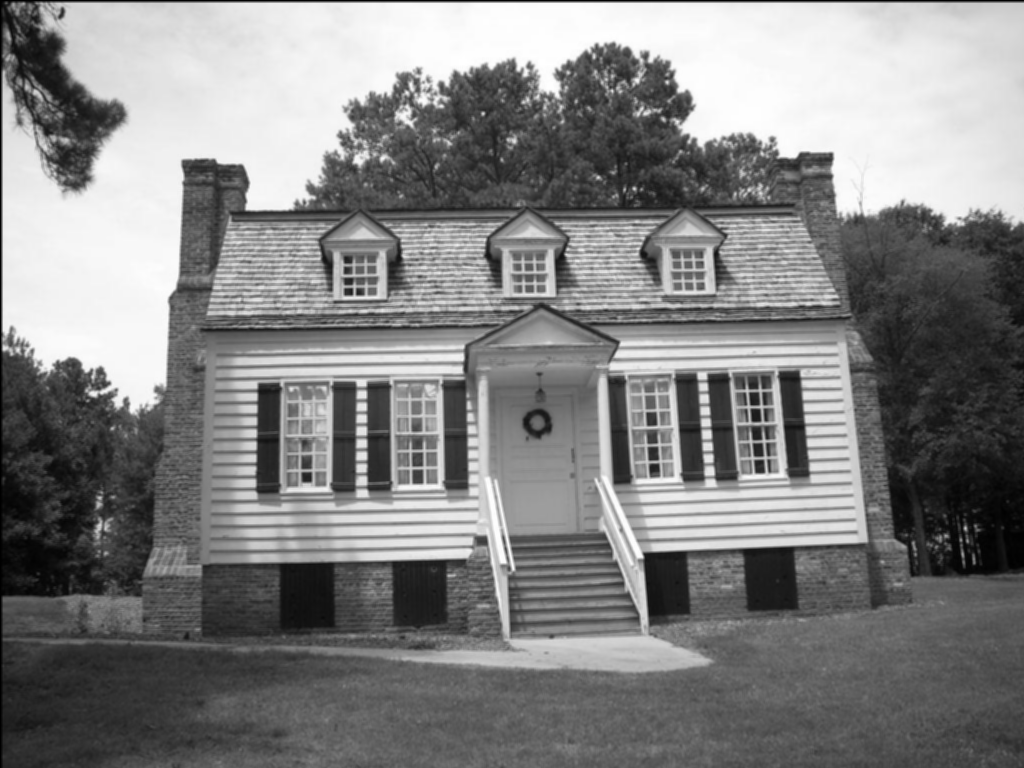

HOUSE 1 Avg 5x5


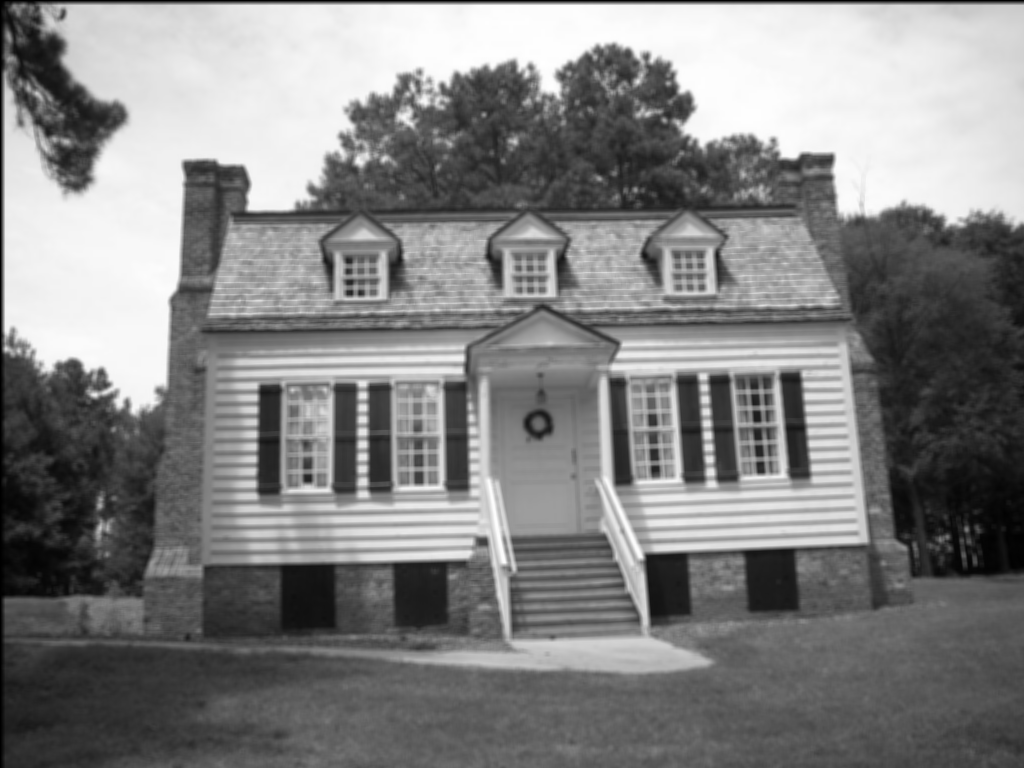

In [ ]:
#Q2-Part 1  'Averaging Kernel (3×3 and 5×5 ) '
# Averaging Kernels
averaging_kernel_3x3 = np.ones((3, 3), dtype=float) / 9
averaging_kernel_5x5 = np.ones((5, 5), dtype=float) / 25
# Apply filters to the images
house1_avg_3x3 = Filter_con(house1, averaging_kernel_3x3)
house1_avg_5x5 = Filter_con(house1, averaging_kernel_5x5)
house2_avg_3x3 = Filter_con(house2, averaging_kernel_3x3)
house2_avg_5x5 = Filter_con(house2, averaging_kernel_5x5)
# Show Results
print('HOUSE 1 Avg 3x3')
cv2_imshow(house1_avg_3x3)
print('HOUSE 1 Avg 5x5')
cv2_imshow(house1_avg_5x5)

print('HOUSE 2 Avg 3x3')
cv2_imshow(house2_avg_3x3)
print('HOUSE 1 Avg 5x5')
cv2_imshow(house2_avg_5x5)

House 1, σ=1 


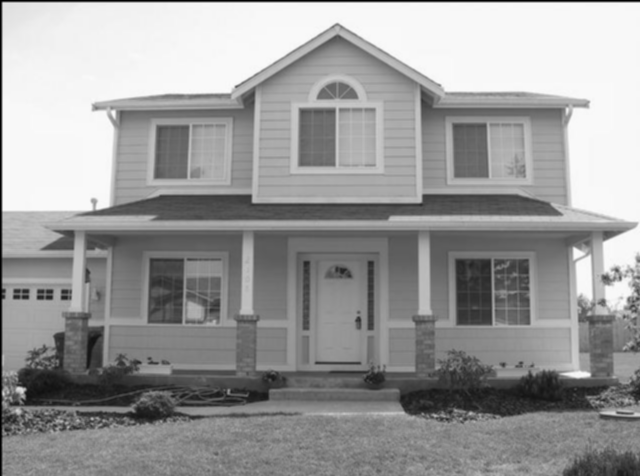

House 1, σ=2 


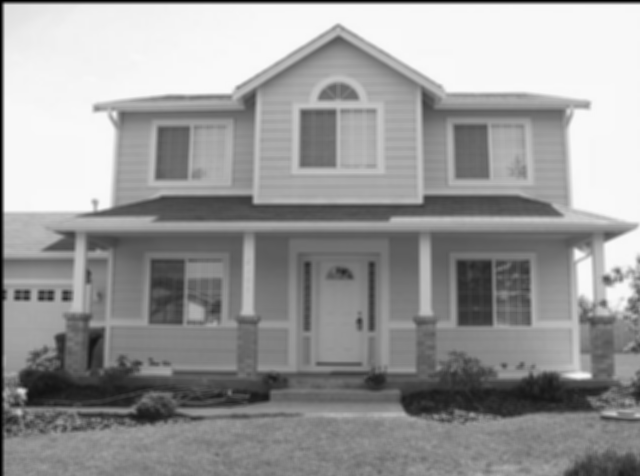

House 1, σ=3 


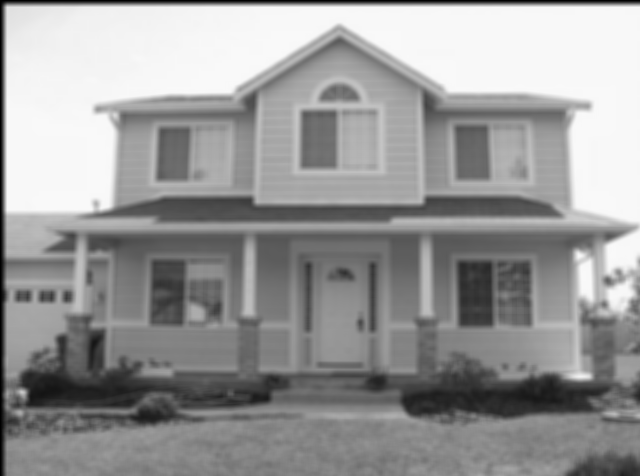

House 2, σ=1 


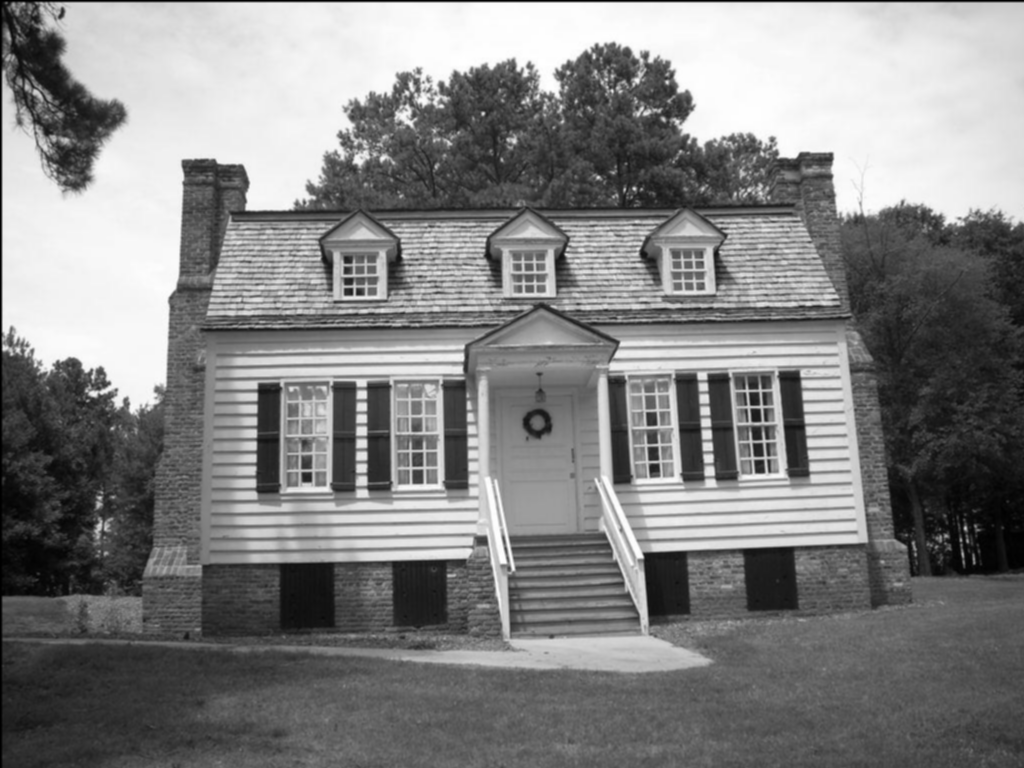

House 2, σ=2 


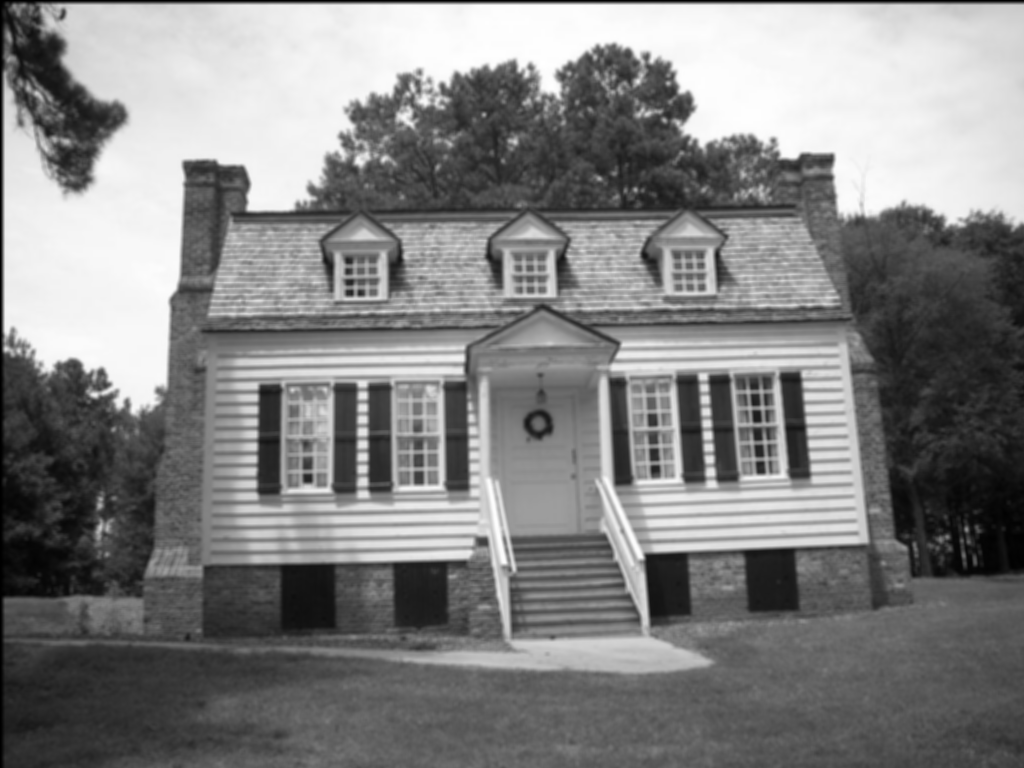

House 2, σ=3 


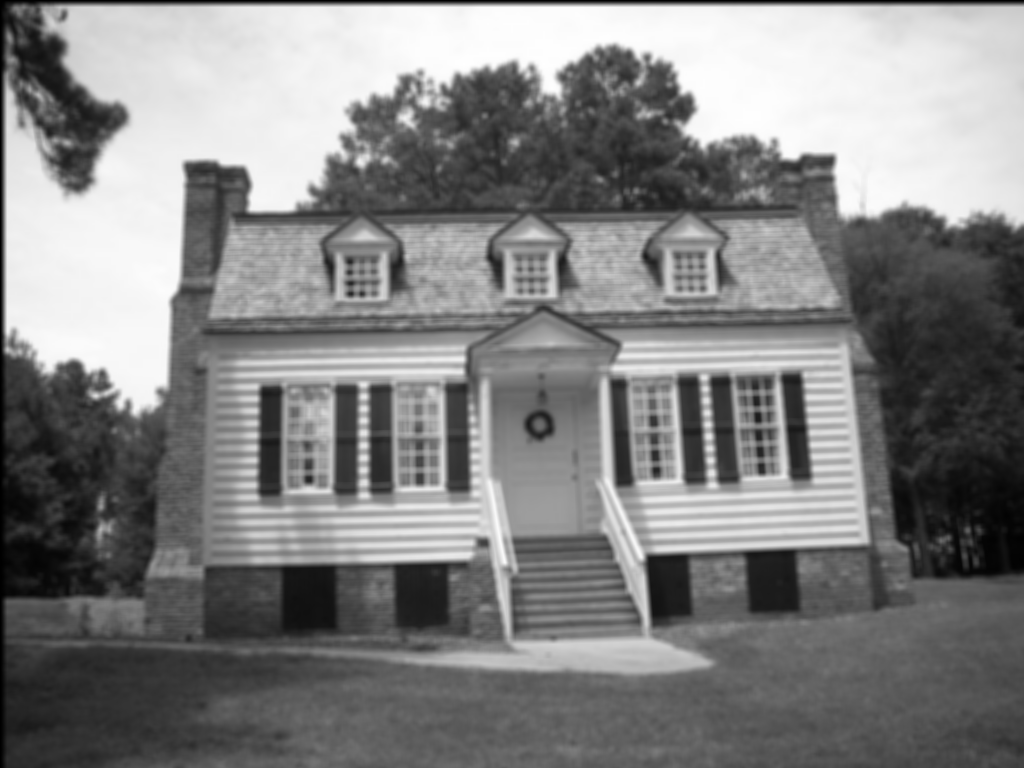

In [ ]:
#Q2 part 2 'Gaussian Kernel (σ = 1,2,3 )'
# Function to find a Gaussian kernel
def find_GaussianKernel(sigma): #K(x, y) = (1 / (2 * pi * sigma^2)) * exp(-(x^2 + y^2) / (2 * sigma^2))
    size = int(2 * sigma + 1)
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-sigma)**2 + (y-sigma)**2)/(2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)
sigma1 = find_GaussianKernel(1)
sigma2 = find_GaussianKernel(2)
sigma3 = find_GaussianKernel(3)
# Apply Gaussian filter to 'house1' and 'house2' for different sigmas
house1_gaussian_1 = Filter_con(house1, sigma1)
house1_gaussian_1 = Filter_con(house1, sigma1)
house1_gaussian_2 = Filter_con(house1, sigma2)
house1_gaussian_3 = Filter_con(house1, sigma3)
house2_gaussian_1 = Filter_con(house2, sigma1)
house2_gaussian_2 = Filter_con(house2, sigma2)
house2_gaussian_3 = Filter_con(house2, sigma3)
#Show results for house 1 and 2
print('House 1, σ=1 ')
cv2_imshow(house1_gaussian_1)
print('House 1, σ=2 ')
cv2_imshow(house1_gaussian_2)
print('House 1, σ=3 ')
cv2_imshow(house1_gaussian_3)
print('House 2, σ=1 ')
cv2_imshow(house2_gaussian_1)
print('House 2, σ=2 ')
cv2_imshow(house2_gaussian_2)
print('House 2, σ=3 ')
cv2_imshow(house2_gaussian_3)


As we can see in the images, the parameter sigma (σ) in the Gaussian kernel plays a crucial role in warping and can greatly affect the blurring of the image. A smaller sigma, such as σ=1, creates a focused Gaussian distribution resulting in a compact kernel that prioritizes local pixel relationships and preserves fine detail. In contrast, using larger sigma values, such as σ=3, broadens the distribution and creates a broader kernel that takes into account information from a wider spatial region. This wider effect results in more noticeable blur as distant pixels play an important role in the convolution process. Therefore, finding the ideal sigma value requires balancing image detail retention with efficient noise reduction. Ultimately, sigma is a trade-off in achieving a desired outcome.

In [92]:
#Q2- Part 3 'Sobel Edge Operators'
# Sobel kernels
sy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Sobel convolution using custom function with zero-padding
sobel_x_h1 = Filter_con(house1, sx)
sobel_y_h1 = Filter_con(house1, sy)

sobel_x_h2 = Filter_con(house2, sx)
sobel_y_h2 = Filter_con(house2, sy)

# Calculate the magnitude of the gradient
sobel_mag_h1 = np.sqrt(sobel_x_h1**2 + sobel_y_h1**2)
sobel_mag_h2 = np.sqrt(sobel_x_h2**2 + sobel_y_h2**2)
# Display the results
print('sopel x for house 1')
cv2_imshow(sobel_x_h1)
print('sopel y for house 1')
cv2_imshow(sobel_y_h1)
print('HOUSE 1 Sobel')
cv2_imshow(sobel_mag_h1)
print('sopel x for house 2')
cv2_imshow(sobel_x_h2)
print('sopel y for house 2')
cv2_imshow(sobel_y_h2)
print('HOUSE 2 Sobel')
cv2_imshow(sobel_mag_h2)

cv2.waitKey(0)
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

In [96]:
#Q2- Part 4 'Prewitt Edge Operators'
# Prewitt kernels
px = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
py = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Prewitt convolution using custom function with zero-padding
prewitt_x_h1 = Filter_con(house1, px)
prewitt_y_h1 = Filter_con(house1, py)

prewitt_x_h2 = Filter_con(house2, px)
prewitt_y_h2 = Filter_con(house2, py)

# Calculate the magnitude of the gradient
prewitt_mag_h1 = np.sqrt(prewitt_x_h1**2 + prewitt_y_h1**2)
prewitt_mag_h2 = np.sqrt(prewitt_x_h2**2 + prewitt_y_h2**2)
# Display the results
print('Prewitt x for house 1')
cv2_imshow(prewitt_x_h1)
print('Prewitt y for house 1')
cv2_imshow(prewitt_y_h1)
print('HOUSE 1 Prewitt Magnitude')
cv2_imshow(prewitt_mag_h1)
print('Prewitt x for house 1')
cv2_imshow(prewitt_x_h2)
print('Prewitt y for house 1')
cv2_imshow(prewitt_y_h2)
print('HOUSE 2 Prewitt Magnitude')
cv2_imshow(prewitt_mag_h2)

cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

Noies Image 1


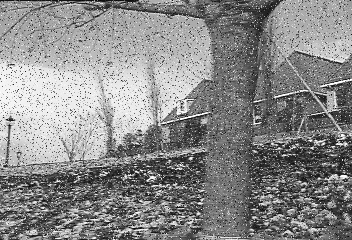

Applying 5X5 Avaraging in Noies Image 1


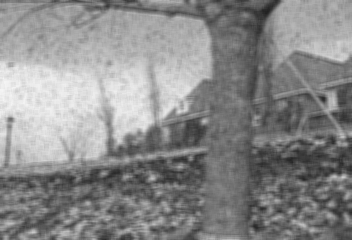

Applying 5X5 median filter in Noies Image 1


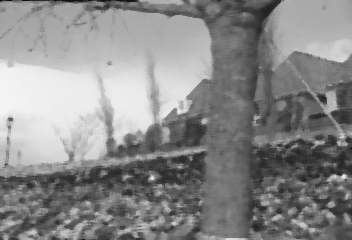

Noies Image 2


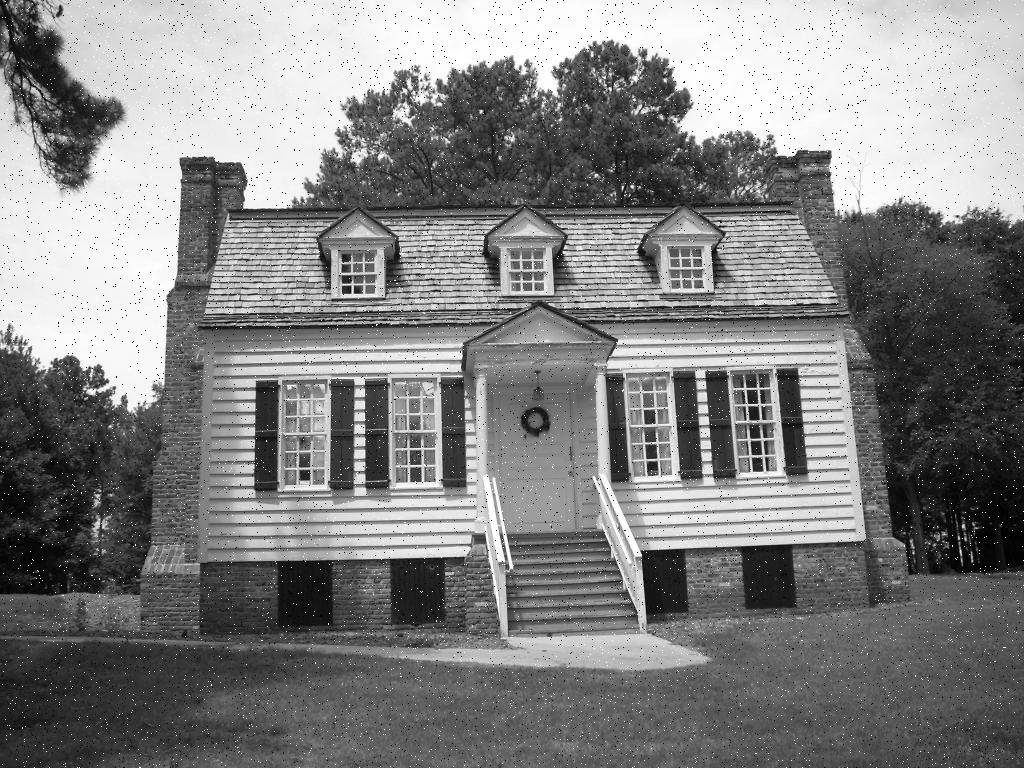

Applying 5X5 Avaraging in Noies Image 2


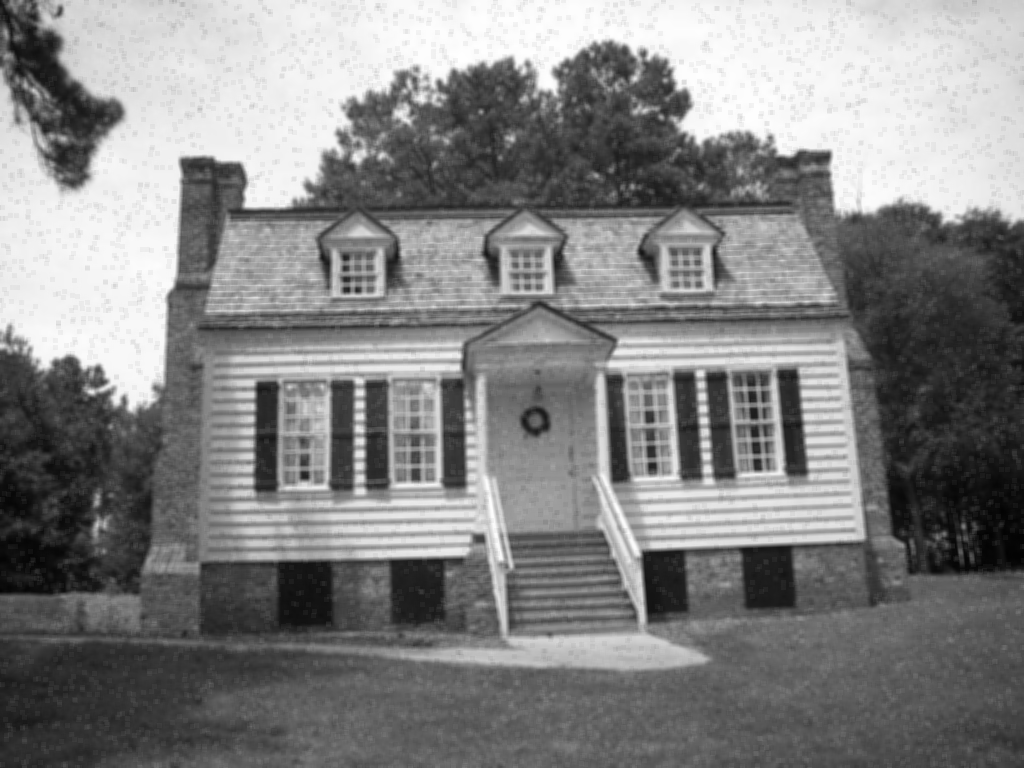

Applying 5X5 median filter in Noies Image 2


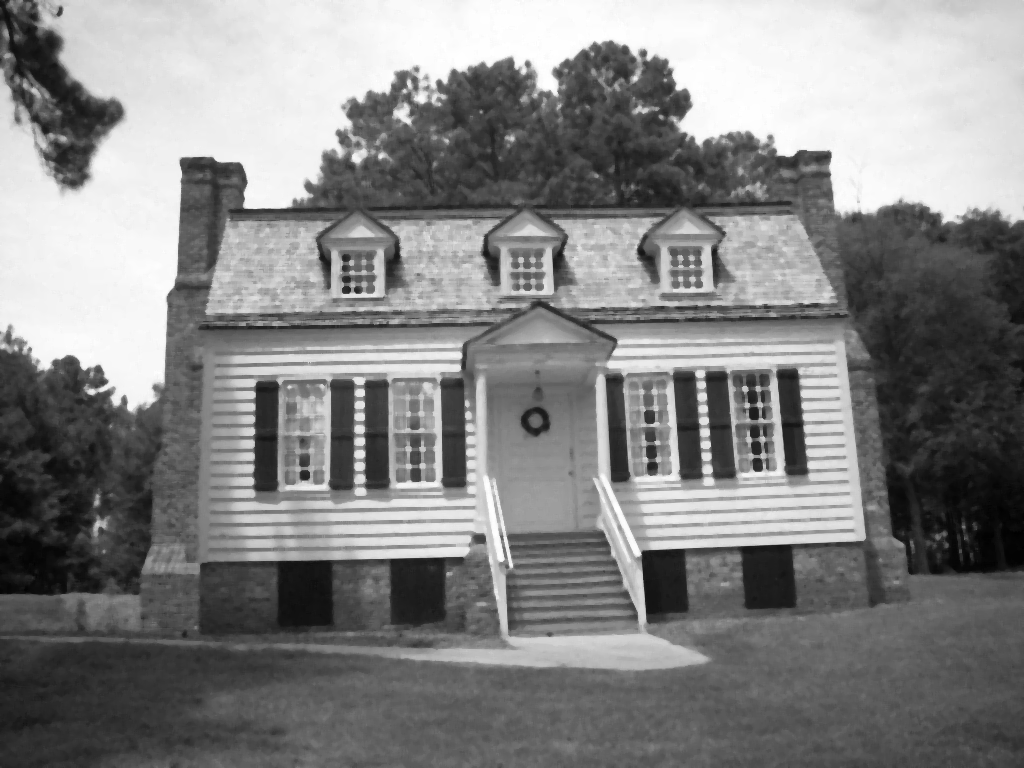

In [ ]:
#Q3 'Apply 5 by 5 Averaging and Median filter'
noiesImg1 = cv2.imread('Noisyimage1.jpg' , cv2.IMREAD_GRAYSCALE)
noiesImg2 = cv2.imread('Noisyimage2.jpg' , cv2.IMREAD_GRAYSCALE)
#--- 5 by 5 Averaging ----------------------
avg_noies1 = cv2.blur(noiesImg1, (5, 5))
avg_noies2 = cv2.blur(noiesImg2, (5, 5))
#---Median filter 5 by 5--------------------
median_noies1 = cv2.medianBlur(noiesImg1, 5)
median_noies2 = cv2.medianBlur(noiesImg2, 5)
#--- Show Resultes--------------------------
print('Noies Image 1')
cv2_imshow(noiesImg1)
print('Applying 5X5 Avaraging in Noies Image 1')
cv2_imshow(avg_noies1)
print('Applying 5X5 median filter in Noies Image 1')
cv2_imshow(median_noies1)
print('Noies Image 2')
cv2_imshow(noiesImg2)
print('Applying 5X5 Avaraging in Noies Image 2')
cv2_imshow(avg_noies2)
print('Applying 5X5 median filter in Noies Image 2')
cv2_imshow(median_noies2)

When tackling salt-and-pepper noise in "Noisyimage1" and "Noisyimage2," 5x5 averaging and median filters offered contrasting solutions. The averaging filter, while reducing overall noise, unfortunately, compromised image details. This happens because it calculates the average of all surrounding pixels, including the isolated bright and dark ones characteristic of salt-and-pepper noise. This averaging drags the intensity of neighboring pixels towards the extreme values, effectively blurring away sharp edges and fine details. On the other hand, the Median filter, a champion in this scenario, replaces each pixel with the median value of its neighbors. This effectively identifies and replaces the outliers caused by the noise, preserving the original intensity values of non-corrupted pixels and maintaining sharper edges and details. In situations plagued by impulse noise like salt and pepper, the median filter's resilience against extreme values proves its superiority over the averaging filter's blurring tendencies.

Orginal Image


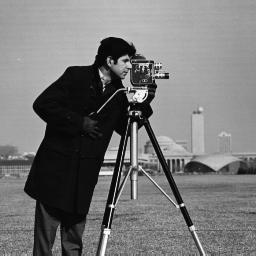

Stretched Magnitude Result


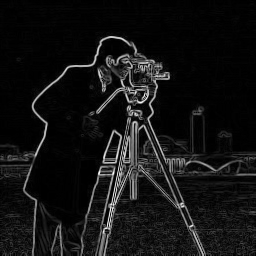

In [ ]:
#Q4 -Part 1 'Stretch the resulting magnitude (between 0 to 255) for better visualization '
import matplotlib.pyplot as plt
imageQ4 = cv2.imread('Q_4.jpg', cv2.IMREAD_GRAYSCALE)
print('Orginal Image')
cv2_imshow(imageQ4)
# Apply Sobel filter
gx = cv2.Sobel(imageQ4, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(imageQ4, cv2.CV_64F, 0, 1, ksize=3)
# Calculate the magnitude of the gradient
magnitude = np.sqrt(gx**2 + gy**2)
# Stretch the resulting magnitude (between 0 to 255)
stretchedImg = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
print('Stretched Magnitude Result')
cv2_imshow(stretchedImg)

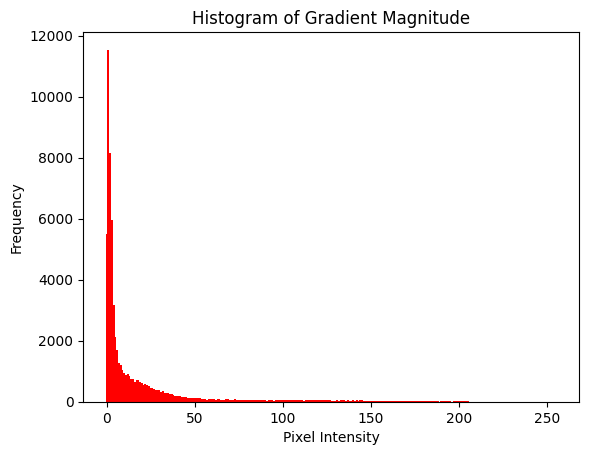

In [ ]:
#Q4-Part 2 'Compute the histogram of gradient magnitude '
# Calculate the histogram of the stretched gradient magnitude
hist = cv2.calcHist([stretchedImg], [0], None, [256], [0, 256])
bin_centers = np.arange(0, 256)
plt.bar(bin_centers, hist.flatten(), width=1.0, color='red')
# Plot the histogram
plt.title('Histogram of Gradient Magnitude')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

Gradient Orientation


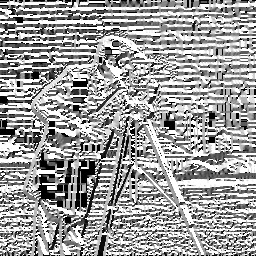

In [ ]:
#Q4-Part 3 'Compute gradient orientation (the angle of gradient vector) '
# Calculate the angle using phase function
angel = cv2.phase(gx, gy, angleInDegrees=True)
print('Gradient Orientation')
cv2_imshow(angel)

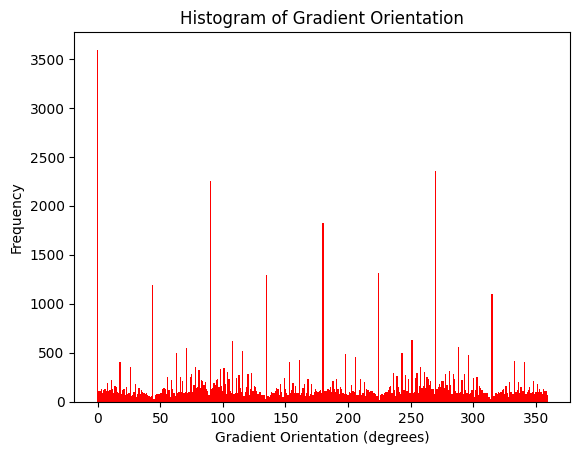

In [ ]:
#Q4-Part 4 'Compute histogram of gradient orientation (angle between 0 and 2*pi)'
# angel range-->[0, 360] degrees
gradient_orientation = (angel + 360) % 360
gradient_orientation_flat = gradient_orientation.flatten()
#Compute histogram of gradient orientation
hist_orientation = cv2.calcHist([gradient_orientation_flat.astype(np.float32)], [0], None, [360], [0, 360])
bin_centers_orientation = np.arange(0, 360)
plt.bar(bin_centers_orientation, hist_orientation.flatten(), width=1.0, color='red')
# Plot the histogram of gradient orientation
plt.title('Histogram of Gradient Orientation')
plt.xlabel('Gradient Orientation (degrees)')
plt.ylabel('Frequency')
plt.show()


Subtract Result


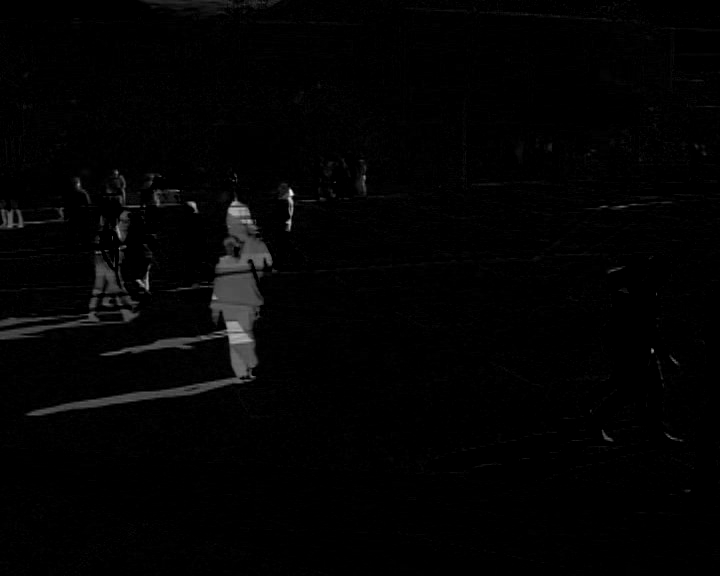

In [ ]:
#Q5 'subtract walk_2.jpg from walk_1.jpg'
#Read Images
walk_1 = cv2.imread('walk_1.jpg')
walk_2 = cv2.imread('walk_2.jpg')
# Convert to grayscale
walk_1_gray = cv2.cvtColor(walk_1, cv2.COLOR_BGR2GRAY)
walk_2_gray = cv2.cvtColor(walk_2, cv2.COLOR_BGR2GRAY)
# apply images subtraction ->subtract walk_2.jpg from walk_1.jpg
diff=cv2.subtract(walk_1_gray, walk_2_gray)
print('Subtract Result')
cv2_imshow(diff)

When we subtract walk_2.jpg from walk_1.jpg, the resulting image shows different objects. Areas in the first image but not in the second appear brighter and whiter, emphasizing the contrast between the two images. This occurs because the act of subtraction emphasizes contradiction. If the pixels in the corresponding areas are the same, the result is zero, resulting in dark areas. In contrast, areas in the second image but not in the first are also seen as bright objects. Differences between images receive non-zero pixel values, visually highlighting differences. Specifically, the extracted images represent similarities and differences between walk_1.jpg and walk_2.jpg, with dark areas indicating similarities and bright areas indicating differences

Canny Edge Detection Result for Thresholds: 25, 50


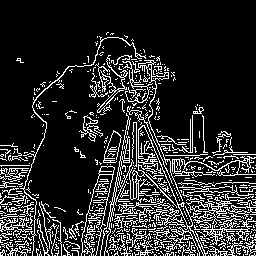

Canny Edge Detection Result for Thresholds: 50, 100


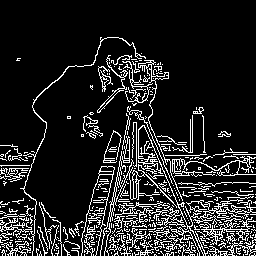

Canny Edge Detection Result for Thresholds: 100, 200


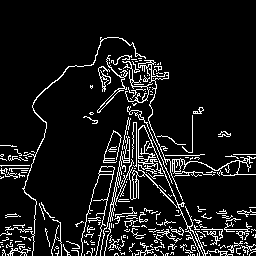

In [ ]:
#Q6
#Define lower and upper thresholds
thresholdL = [25, 50, 100]
thresholdU= [50, 100, 200]
for t1, t2 in zip(thresholdL, thresholdU): # Iterate over the threshold and apply Canny edge detection
    edges = cv2.Canny(imageQ4, t1, t2)
    print(f'Canny Edge Detection Result for Thresholds: {t1}, {t2}')
    cv2_imshow(edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()